Include useful packages:

In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The data points can be stored in numpy arrays

In [87]:
xvalues = np.array([50.0,60.0,70.0,72.0,74.0,76.0,78.0,80.0,90.0,100.0])
yvalues = np.array([7000,7000,7000,7300,9540, 12320, 13600, 14000,14000,14000])
yerrors = np.array(yvalues.size*[100])

ax = np.arange(50,100,0.1) # extra x axis from 50 to 100 in small steps for drawing later
# print(ax)

[50.  50.1 50.2 50.3 50.4 50.5 50.6 50.7 50.8 50.9 51.  51.1 51.2 51.3
 51.4 51.5 51.6 51.7 51.8 51.9 52.  52.1 52.2 52.3 52.4 52.5 52.6 52.7
 52.8 52.9 53.  53.1 53.2 53.3 53.4 53.5 53.6 53.7 53.8 53.9 54.  54.1
 54.2 54.3 54.4 54.5 54.6 54.7 54.8 54.9 55.  55.1 55.2 55.3 55.4 55.5
 55.6 55.7 55.8 55.9 56.  56.1 56.2 56.3 56.4 56.5 56.6 56.7 56.8 56.9
 57.  57.1 57.2 57.3 57.4 57.5 57.6 57.7 57.8 57.9 58.  58.1 58.2 58.3
 58.4 58.5 58.6 58.7 58.8 58.9 59.  59.1 59.2 59.3 59.4 59.5 59.6 59.7
 59.8 59.9 60.  60.1 60.2 60.3 60.4 60.5 60.6 60.7 60.8 60.9 61.  61.1
 61.2 61.3 61.4 61.5 61.6 61.7 61.8 61.9 62.  62.1 62.2 62.3 62.4 62.5
 62.6 62.7 62.8 62.9 63.  63.1 63.2 63.3 63.4 63.5 63.6 63.7 63.8 63.9
 64.  64.1 64.2 64.3 64.4 64.5 64.6 64.7 64.8 64.9 65.  65.1 65.2 65.3
 65.4 65.5 65.6 65.7 65.8 65.9 66.  66.1 66.2 66.3 66.4 66.5 66.6 66.7
 66.8 66.9 67.  67.1 67.2 67.3 67.4 67.5 67.6 67.7 67.8 67.9 68.  68.1
 68.2 68.3 68.4 68.5 68.6 68.7 68.8 68.9 69.  69.1 69.2 69.3 69.4 69.5
 69.6 

Create a plot with the data defined above

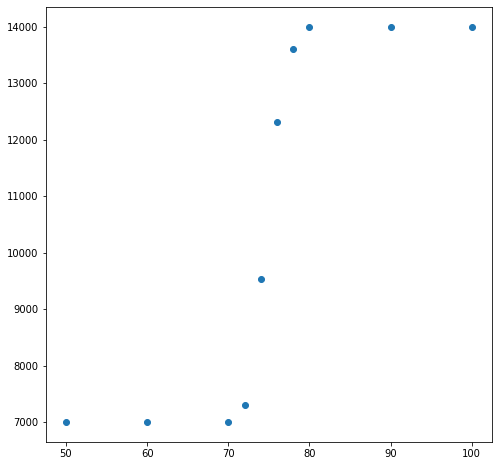

In [88]:
# plt.rcParams["figure.figsize"] = (8,8)
plt.plot(xvalues,yvalues,"o")
plt.show()

Lets define a function do parametrise the data

In [89]:
def fermi(x,A,B,C):
    """A function with the shape of a fermi-dirac distribution"""
    """Todo: Add proper variable names"""
    y = ( A - ( A/ ( np.exp( (x-B) /C ) +2 ) ) )
    return y

We use the `curve_fit` function from the scipy optimize module to fit our data.

In [90]:
startValues = [14000.,75.,3.]
parameters, covariance = curve_fit(fermi, xvalues, yvalues, startValues)
# parameters, covariance = curve_fit(fermi, xvalues, yvalues, startValues, yerrors, True)

In [93]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
# was:
# fit_A = parameters[0]
# fit_C = parameters[1]
# fit_B = parameters[2]

print("fit_A: ", fit_A)
print("fit_B: ", fit_B)
print("fit_C: ", fit_C)
fit_y = fermi(ax,fit_A,fit_B,fit_C)
print("cov: \n", covariance)

fit_A:  13960.890273869798
fit_B:  73.93285020108559
fit_C:  1.0692251340333283
cov: 
 [[ 2.91838770e+03  1.65047173e+00  5.40222706e-01]
 [ 1.65047173e+00  5.34783495e-03 -1.35114371e-03]
 [ 5.40222706e-01 -1.35114371e-03  2.58534591e-03]]


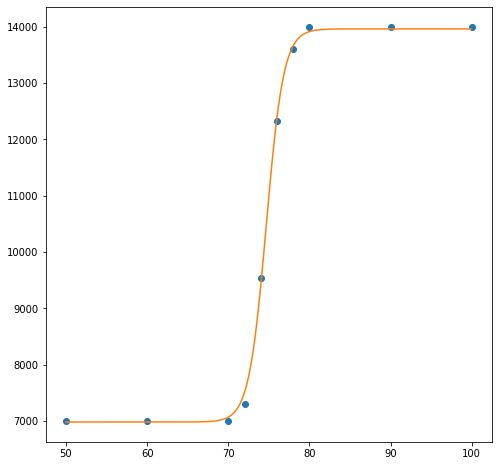

In [94]:
plt.plot(xvalues,yvalues,"o")
# plt.plot(xvalues,fit_y,"-")
plt.plot(ax,fit_y,"-")
plt.show()